# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [124]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

import statsmodels.formula.api as smf

%matplotlib inline

### Step 2: Read in your data set 

In [16]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [113]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: We have a total of 1,595 observations

#### Question 2. Create a summary table

In [114]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger range of scoring than GPA. The min to max values for GRE is 220-800 versus GPA is 2.26-4. 

#### Question 4. Drop data points with missing data


In [116]:
df_new = df_raw.dropna()
df_new.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [141]:
for c in df_new.columns:
    print(c, len(df_new[df_new[c].isnull()]))

('admit', 0)
('gre', 0)
('gpa', 0)
('prestige', 0)


Answer: The new counts for observations are the same across all variables. This indicates that all variables have the same number of observations because any row with a missing value was eliminated. The drop na however will still count the row if all values in the row are null so using len which does not count null values would be more accurate. 

#### Question 6. Create box plots for GRE and GPA

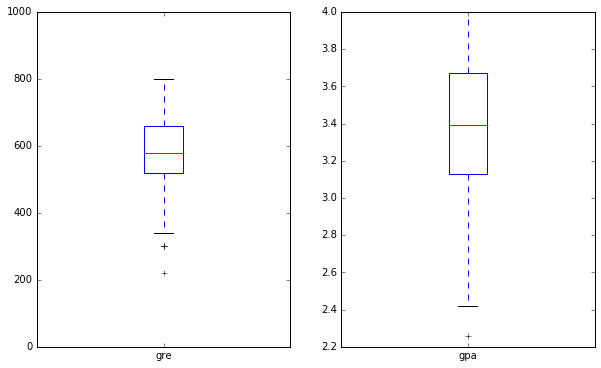

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

df_raw.gre.plot(kind="box", ax=axs[0])
axs[0].set_ylim([0, 1000])

admissions.gpa.plot(kind="box", ax=axs[1])

#### Question 7. What do this plots show?

Answer: Box plots gives a visualization of the min, max, median, the quartile, interquartile range, and outliers. Outliers will have values smaller than the lower inner fence Q1 - 1.5IQR and values that are larger than the upper fence Q3 + 1.5IQR. 

#### Question 8. Describe each distribution 

In [45]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


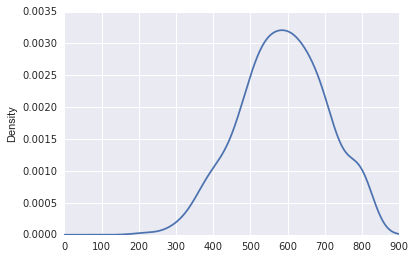

In [147]:
# plot the distribution of each variable 
df_raw.gre.plot(kind='density', xlim=(0, 900))

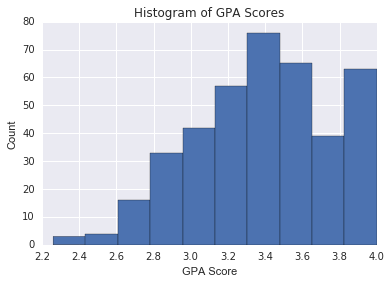

In [145]:
# plot the distribution of each variable 
df_raw.gpa.plot(kind='hist', bins=10, title='Histogram of GPA Scores')
plt.xlabel('GPA Score')
plt.ylabel('Count')

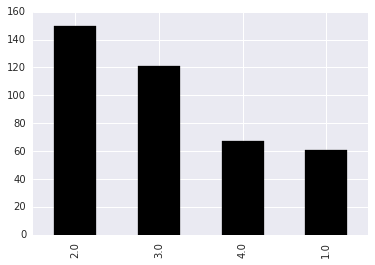

In [171]:
df_raw.prestige.value_counts().plot(kind='bar', color ='k')

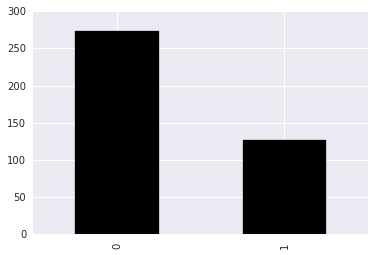

In [153]:
df_raw.admit.value_counts().plot(kind='bar', color='k')

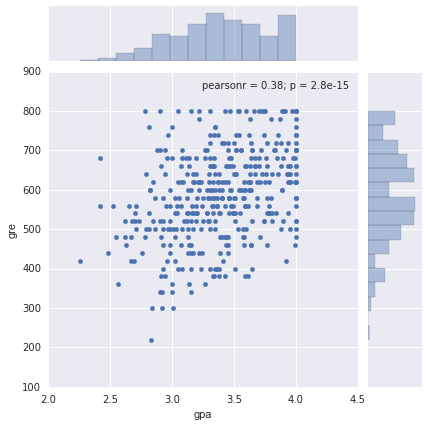

In [154]:
import seaborn as sns
sns.jointplot('gpa', 'gre', data=df_new)

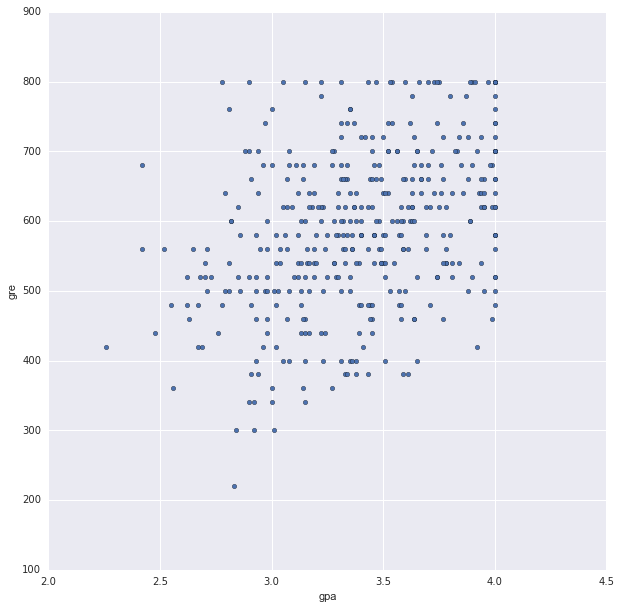

In [155]:
admissions.plot(x='gpa',
                y='gre',
                kind="scatter",
              figsize=(10,10))

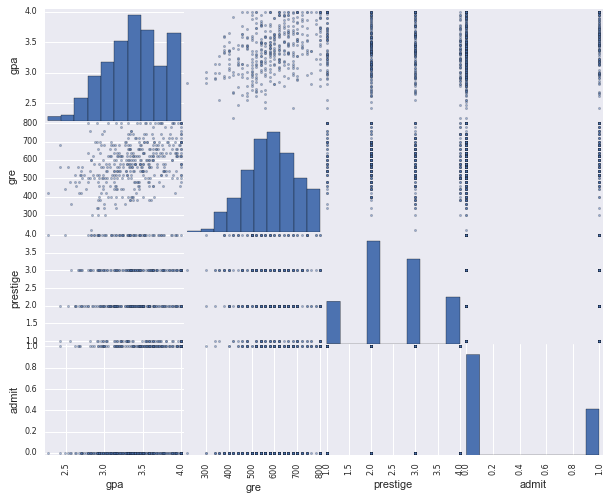

In [158]:
pd.scatter_matrix(df_new[['gpa', 'gre', 'prestige', 'admit']], figsize=(10, 8))
plt.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [126]:
X = df_raw[['gpa']]
y = df_raw['gre']

lm = smf.ols(formula='y ~ X', data=df_raw).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           2.84e-15
Time:                        07:39:28   Log-Likelihood:                -2417.6
No. Observations:                 397   AIC:                             4839.
Df Residuals:                     395   BIC:                             4847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    193.0449     48.299      3.997      0.000        98.089   288.001
X            116.3873     14.150      8.225      0.000        88.569   144.206
==============================================================================
Omnibus:                        1.159   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.172
Skew:                          -0.045   Prob(JB):                        0.557
Kurtosis:                       2.749   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

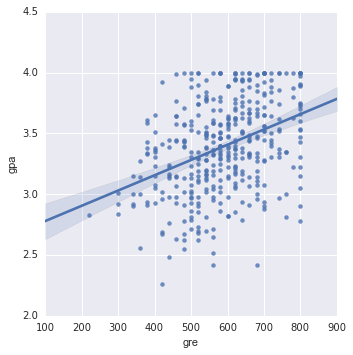

In [120]:
sns.lmplot('gre', 'gpa', df_raw)

Answer: P-value is 0, therefore there is no relationship between gpa and gre. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: There doesn't appear to be a relationship as P-value appears to approach zero. Try using logistic regression. 

In [163]:
# Log transformed
X = log_df_raw[['gre']]
y = log_df_raw['gpa']

lm = smf.ols(formula='y ~ X', data=df_raw).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     66.98
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           3.81e-15
Time:                        12:38:00   Log-Likelihood:                 658.13
No. Observations:                 397   AIC:                            -1312.
Df Residuals:                     395   BIC:                            -1304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0473      0.070     -0.673      0.501        -0.185     0.091
X              0.2083      0.025      8.184      0.000         0.158     0.258
==============================================================================
Omnibus:                       16.347   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.546
Skew:                          -0.515   Prob(JB):                     0.000155
Kurtosis:                       3.026   Cond. No.                         94.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

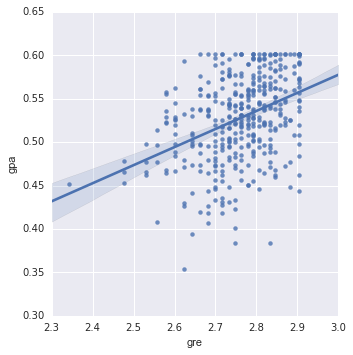

In [118]:
log_df_raw = df_raw[['gre', 'gpa']].apply(np.log10)

sns.lmplot('gre', 'gpa', log_df_raw)

#### Question 11. Which of our variables are potentially colinear? 

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


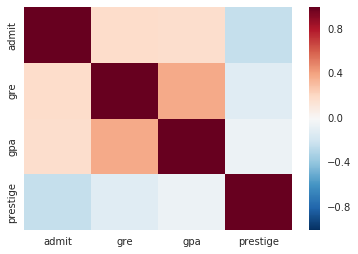

In [111]:
# create a correlation matrix for the data
sns.heatmap(df_raw.corr())
df_raw.corr()

#### Question 12. What did you find?

Answer: GPA and GRE have a ~4% potential colinearity.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1) Determine whether the predictors are or are not correlated with the outcome. In this example, conclude if admissions correlate to prestige. 
2) Collect the necessary datapoints to determine whether there is a correlation between GRE score and admittance. Create a data dictionary with these variables with their appropriate data type. Look at the distribution of data and see if it's normal using the describe function to see mean, median, mode, IQR, std and various plots such as scatter or box plot to see if there are any skews or outliers that may need to be addressed. Since we do not have a time frame available, does the data looked skewed that it suggests it's not a representative random sample. 
3) Explore data points more deeply. For example, how is prestige determined and are there any outliers, are there any missing values that need to be cleaned up?
4) Build a logistic regression. 

#### Question 14. What is your hypothesis? 

Answer: Students that are enrolled in a a more prestigious undergraduate school are more likely to be admitted than those that attend a lower prestigious undergraduate school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data